#11.1 Data Augmention

##Datos

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [ ]:
from google.colab import files
# se debe cargar el fichero “cats_and_dogs_small.zip”
files.upload()

Saving cats_and_dogs_small.zip to cats_and_dogs_small.zip


In [ ]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_small.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))

##11.1.2 Configuracion de ImageGenerator

Saving Wiliams-foto1.jpg to Wiliams-foto1 (2).jpg


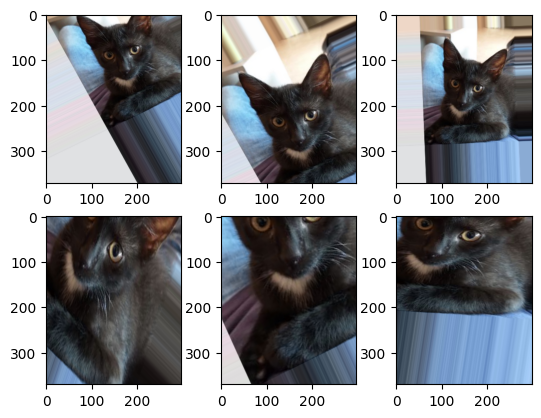

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path)
  data = img_to_array(img)
  samples = expand_dims(data, 0)

  # example of "rotation_range"
  datagen = ImageDataGenerator(rotation_range=45, zoom_range=0.5, width_shift_range=0.6)

  it = datagen.flow(samples, batch_size=1)
  for i in range(6):
  	pyplot.subplot(230 + 1 + i)
  	batch = it.next()
  	image = batch[0].astype('uint8')
  	pyplot.imshow(image)
pyplot.show()

##11.1.3 Codigo del caso de estudio

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#El aumento de datos de imagen solo se aplica a los datos de entrenamiento, y no al conjunto de validacion o prueba.
#El reescalado de los pixeles si se aplica a todos

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
)
validation_dategen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)


train_generator= train_datagen.flow_from_directory(train_dir,
                                                   batch_size = 20,
                                                   class_mode='binary',
                                                   target_size = (150,150))

validation_generator= validation_dategen.flow_from_directory(validation_dir,
                                                   batch_size = 20,
                                                   class_mode='binary',
                                                   target_size = (150,150))

test_generator= test_datagen.flow_from_directory(test_dir,
                                                   batch_size = 20,
                                                   class_mode='binary',
                                                   target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import RMSprop

modelDA = Sequential()
modelDA.add(Conv2D(32, (3,3), activation ='relu', input_shape=(150,150,3)))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Conv2D(64, (3,3), activation = 'relu'))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Conv2D(128, (3,3), activation = 'relu'))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Conv2D(128, (3,3), activation = 'relu'))
modelDA.add(MaxPooling2D((2,2)))
modelDA.add(Flatten())
modelDA.add(Dense(512,activation ='relu'))
modelDA.add(Dense(1,activation ='sigmoid'))

modelDA.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=1e-4), metrics =['acc'])

In [ ]:
print(train_generator.n)
print(validation_generator.n)

2000
1000


In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print(steps_per_epoch)# pasos por epoch. (100 lotes de 20 muestras)
print(validation_steps) # pasos por epoch. (50 lotes de 20 muestras)

100
50


In [ ]:
historyDA = modelDA.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    verbose = 2
)

Epoch 1/100
100/100 - 131s - loss: 0.7142 - acc: 0.5025 - val_loss: 0.6925 - val_acc: 0.5000 - 131s/epoch - 1s/step
Epoch 2/100
100/100 - 128s - loss: 0.6943 - acc: 0.5135 - val_loss: 0.6916 - val_acc: 0.5090 - 128s/epoch - 1s/step
Epoch 3/100
100/100 - 128s - loss: 0.6966 - acc: 0.5310 - val_loss: 0.6757 - val_acc: 0.5800 - 128s/epoch - 1s/step
Epoch 4/100
100/100 - 124s - loss: 0.6734 - acc: 0.5760 - val_loss: 0.6756 - val_acc: 0.5480 - 124s/epoch - 1s/step
Epoch 5/100
100/100 - 122s - loss: 0.6563 - acc: 0.6320 - val_loss: 0.6124 - val_acc: 0.6540 - 122s/epoch - 1s/step
Epoch 6/100
100/100 - 118s - loss: 0.6428 - acc: 0.6525 - val_loss: 0.6206 - val_acc: 0.6590 - 118s/epoch - 1s/step
Epoch 7/100
100/100 - 127s - loss: 0.6233 - acc: 0.6525 - val_loss: 0.6554 - val_acc: 0.6120 - 127s/epoch - 1s/step
Epoch 8/100
100/100 - 127s - loss: 0.6260 - acc: 0.6475 - val_loss: 0.6283 - val_acc: 0.6640 - 127s/epoch - 1s/step
Epoch 9/100
100/100 - 127s - loss: 0.6114 - acc: 0.6655 - val_loss: 0.58

In [ ]:
historyDA_dic = historyDA.history
print(historyDA_dic.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<Figure size 640x480 with 0 Axes>

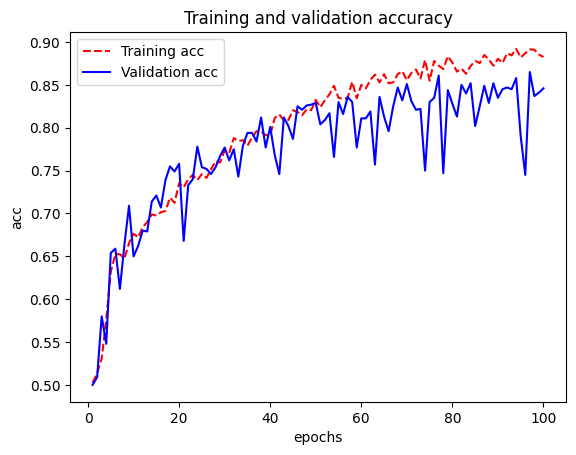

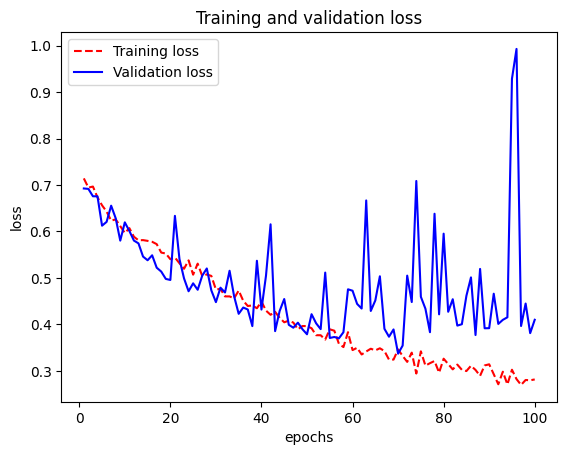

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = historyDA_dic['acc']
loss = historyDA_dic['loss']
val_loss = historyDA_dic['val_loss']
val_acc = historyDA_dic['val_acc']
epochs = range(1,len(acc)+1,1)

plt.plot(epochs, acc, 'r--', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.figure()


In [ ]:
test_loss, test_acc = modelDA.evaluate(test_generator)
print('Test Accuracy:',round(test_acc,3))
print('Test Loss:',round(test_loss,3))

50/50 [==============================] - 29s 578ms/step - loss: 0.4297 - acc: 0.8470
Test Accuracy: 0.847
Test Loss: 0.43


#11.2 Transfer Learning

## 11.2.2 Feature Extraction

In [ ]:
from tensorflow.keras.applications import VGG16


#Modelo entrenado de 1.4 millones de imagenes con 1000 clases entre ellas perro y gato (VGG16)

pre_trained_model = VGG16(input_shape = (150,150,3),
                          include_top = False, #Incluir o no el clasificador de la ultima capa
                          weights = 'imagenet' #De donde se obtiene los pesos de los parametros de la red (ImageNet)
                          )

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#Congelar las capas convolucionales para que no sean entrenadas, para que no cambien los valores previamente aprendidos por este modelo

for layer in pre_trained_model.layers:
  layer.trainable =False

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import RMSprop


modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256,activation ='relu'))
modelFE.add(Dense(1,activation ='sigmoid'))


In [ ]:
modelFE.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
modelFE.compile(loss='binary_crossentropy',
                optimizer = RMSprop(lr=1e-4),
                metrics=['acc'])

In [ ]:
historyFE = modelFE.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    verbose = 2
)

Epoch 1/10
100/100 - 729s - loss: 0.3805 - acc: 0.8235 - val_loss: 0.2734 - val_acc: 0.8850 - 729s/epoch - 7s/step
Epoch 2/10
100/100 - 726s - loss: 0.3455 - acc: 0.8395 - val_loss: 0.2628 - val_acc: 0.8850 - 726s/epoch - 7s/step
Epoch 3/10
100/100 - 784s - loss: 0.3491 - acc: 0.8410 - val_loss: 0.2772 - val_acc: 0.8740 - 784s/epoch - 8s/step
Epoch 4/10
100/100 - 690s - loss: 0.3167 - acc: 0.8545 - val_loss: 0.2545 - val_acc: 0.9040 - 690s/epoch - 7s/step
Epoch 5/10
100/100 - 733s - loss: 0.3239 - acc: 0.8495 - val_loss: 0.2506 - val_acc: 0.9000 - 733s/epoch - 7s/step
Epoch 6/10
100/100 - 720s - loss: 0.3068 - acc: 0.8585 - val_loss: 0.2445 - val_acc: 0.9060 - 720s/epoch - 7s/step
Epoch 7/10
100/100 - 719s - loss: 0.3037 - acc: 0.8765 - val_loss: 0.2504 - val_acc: 0.9020 - 719s/epoch - 7s/step
Epoch 8/10
100/100 - 737s - loss: 0.3058 - acc: 0.8645 - val_loss: 0.2492 - val_acc: 0.8960 - 737s/epoch - 7s/step
Epoch 9/10
100/100 - 720s - loss: 0.2968 - acc: 0.8805 - val_loss: 0.2753 - val_

In [ ]:
test_loss, test_acc = modelFE.evaluate(test_generator)
print('Test Accuracy:',round(test_acc,3))
print('Test Loss:',round(test_loss,3))

50/50 [==============================] - 235s 5s/step - loss: 0.2660 - acc: 0.8990
Test Accuracy: 0.899
Test Loss: 0.266


In [ ]:
historyFE_dic = historyFE.history
print(historyFE_dic.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<Figure size 640x480 with 0 Axes>

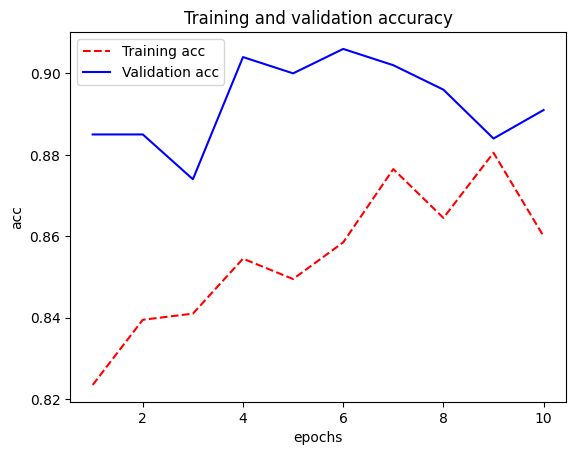

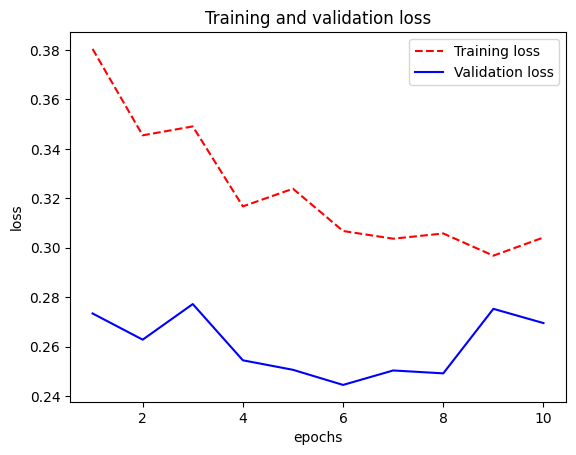

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = historyFE_dic['acc']
loss = historyFE_dic['loss']
val_loss = historyFE_dic['val_loss']
val_acc = historyFE_dic['val_acc']
epochs = range(1,len(acc)+1,1)

plt.plot(epochs, acc, 'r--', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.figure()


##11.2.3 Fine-Tunning

In [ ]:
from tensorflow.keras.applications import VGG16


#Modelo entrenado de 1.4 millones de imagenes con 1000 clases entre ellas perro y gato (VGG16)

pre_trained_model = VGG16(input_shape = (150,150,3),
                          include_top = False, #Incluir o no el clasificador de la ultima capa
                          weights = 'imagenet' #De donde se obtiene los pesos de los parametros de la red (ImageNet)
                          )

#Indica si las capas de block5 deben ser entrenadas mediante la asignacion de True al parametro set_trainable de la capa
pre_trained_model.trainable = True

set_trainable = False

for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import RMSprop


modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256,activation ='relu'))
modelFT.add(Dense(1,activation ='sigmoid'))

In [ ]:
modelFT.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
modelFT.compile(loss='binary_crossentropy',
                optimizer = RMSprop(lr=1e-4),
                metrics=['acc'])

historyFT = modelFT.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    verbose = 2
)

Epoch 1/10
100/100 - 817s - loss: 0.2808 - acc: 0.8915 - val_loss: 0.2306 - val_acc: 0.9060 - 817s/epoch - 8s/step
Epoch 2/10
100/100 - 774s - loss: 0.2550 - acc: 0.9095 - val_loss: 0.1971 - val_acc: 0.9190 - 774s/epoch - 8s/step
Epoch 3/10
100/100 - 805s - loss: 0.2377 - acc: 0.9035 - val_loss: 0.2484 - val_acc: 0.9110 - 805s/epoch - 8s/step
Epoch 4/10
100/100 - 806s - loss: 0.2872 - acc: 0.9060 - val_loss: 0.2369 - val_acc: 0.9230 - 806s/epoch - 8s/step
Epoch 5/10
100/100 - 804s - loss: 0.2150 - acc: 0.9195 - val_loss: 0.6939 - val_acc: 0.7700 - 804s/epoch - 8s/step
Epoch 6/10
100/100 - 804s - loss: 0.2165 - acc: 0.9235 - val_loss: 0.1877 - val_acc: 0.9330 - 804s/epoch - 8s/step
Epoch 7/10
100/100 - 802s - loss: 0.2105 - acc: 0.9275 - val_loss: 0.2190 - val_acc: 0.9250 - 802s/epoch - 8s/step
Epoch 8/10
100/100 - 801s - loss: 0.1705 - acc: 0.9340 - val_loss: 0.4793 - val_acc: 0.9150 - 801s/epoch - 8s/step
Epoch 9/10
100/100 - 802s - loss: 0.2247 - acc: 0.9300 - val_loss: 0.2625 - val_

In [ ]:
test_loss, test_acc = modelFT.evaluate(test_generator)
print('Test Accuracy:',round(test_acc,3))
print('Test Loss:',round(test_loss,3))

50/50 [==============================] - 248s 5s/step - loss: 0.2642 - acc: 0.9080
Test Accuracy: 0.908
Test Loss: 0.264


In [ ]:
historyFT_dic = historyFE.history
print(historyFE_dic.keys())

<Figure size 640x480 with 0 Axes>

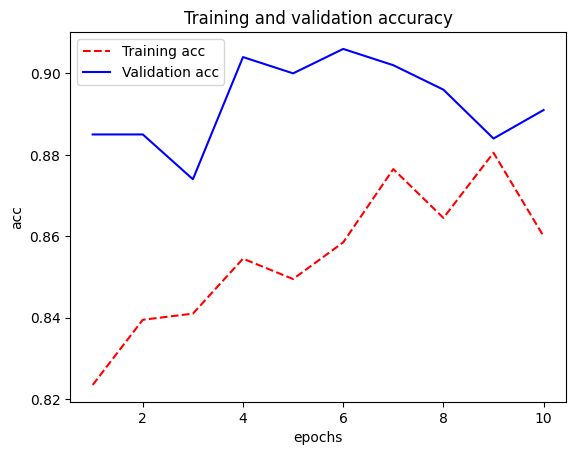

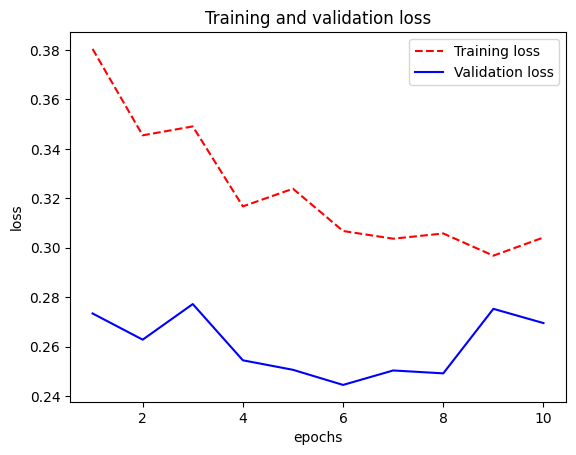

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = historyFT_dic['acc']
loss = historyFT_dic['loss']
val_loss = historyFT_dic['val_loss']
val_acc = historyFT_dic['val_acc']
epochs = range(1,len(acc)+1,1)

plt.plot(epochs, acc, 'r--', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.figure()

Saving Wiliams-foto1.jpg to Wiliams-foto1 (1).jpg
1/1 [==============================] - 0s 469ms/step
[[0.]]


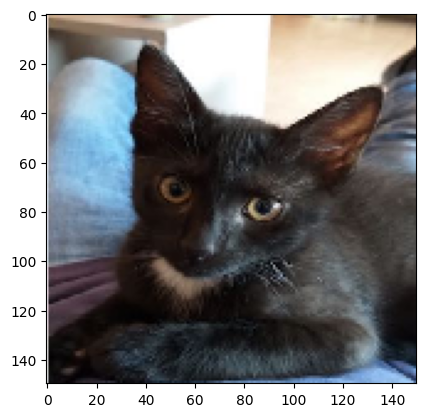

Wiliams-foto1 (1).jpg IS A CAT


In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)

classes = modelFT.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( file + " IS A DOG")
else: print( file + " IS A CAT")

# RESUMEN

In [ ]:

accDA      = historyDA.history[     'acc' ]
val_accDA  = historyDA.history[ 'val_acc' ]

accFE      = historyFE.history[     'acc' ]
val_accFE  = historyFE.history[ 'val_acc' ]

accFT      = historyFT.history[     'acc' ]
val_accFT  = historyFT.history[ 'val_acc' ]

epochs    = range(1,len(accDA)+1,1)

plt.figure(figsize=(10,18))

plt.plot  ( epochs,     accFT, 'k', label='Fine Tuning - Training acc '  )
plt.plot  ( epochs, val_accFT,  'b', label='Fine Tuning - Validation acc ')

plt.plot  ( epochs,     accFE, 'r--', label='Feature Extraction - Training acc'  )
plt.plot  ( epochs, val_accFE,  'm--', label='Feature Extraction - Validation acc')

plt.plot  ( epochs,     accDA, 'g:', label='Data Augmentation - Training acc'  )
plt.plot  ( epochs, val_accDA,  'c:', label='Data Augmentation - Validation acc')

plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.ylim(0.5,1)
plt.xlabel('epochs')


plt.legend()
plt.figure()

NameError: name 'historyDA' is not defined